In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import json
import os

In [2]:
s = 12  # Estacionalidad de 12 meses

In [3]:
# Cargar serie transformada
serie = pd.read_csv(
    "../data/processed/serie_mensual.csv",
    index_col=0,
    parse_dates=True
).squeeze()

In [5]:
serie.head()

datesold
2007-02-01    290000.0
2007-03-01    319000.0
2007-04-01    399000.0
2007-05-01    339500.0
2007-06-01    345000.0
Name: price, dtype: float64

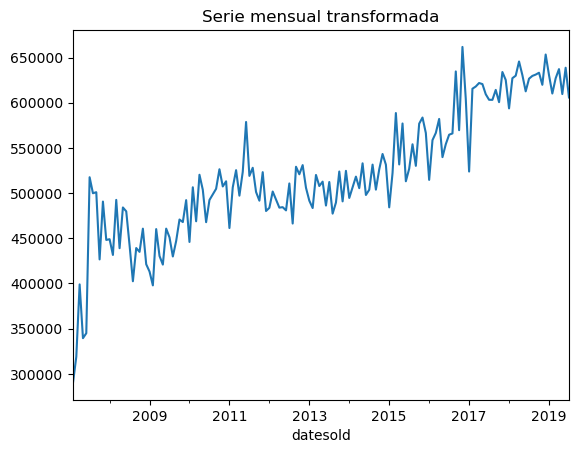

In [4]:
serie.plot(title="Serie mensual transformada")
plt.show()

In [9]:
train = serie.iloc[:-s]
test = serie.iloc[-s:]

In [22]:
modelo_ses = sm.tsa.SimpleExpSmoothing(
    train,
    initialization_method="estimated"
).fit()

c:\Users\danie\anaconda3\envs\mineria_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
pred = modelo_ses.forecast(steps=s)

In [24]:
mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))
print('Rendimiento del modelo SES-Dataset Original: ')
print("MAE:", mae)
print("RMSE:", rmse)

Rendimiento del modelo SES-Dataset Original: 
MAE: 11332.775141123595
RMSE: 13415.706250664005


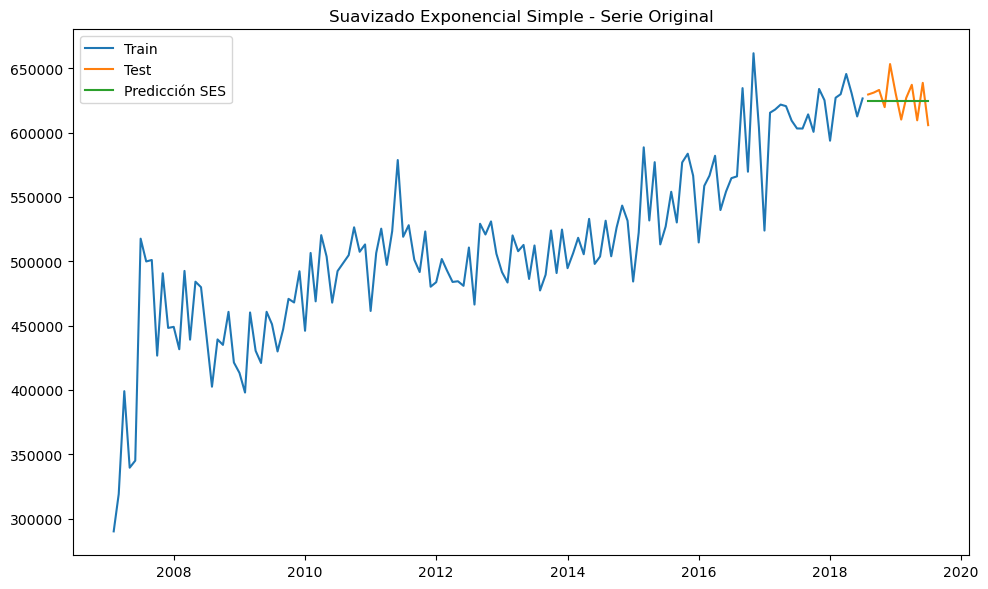

In [25]:
plt.figure(figsize=(10, 6))

plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(pred, label="Predicción SES")

plt.legend()
plt.title("Suavizado Exponencial Simple - Serie Original")
plt.tight_layout()

In [49]:
modelo_hw = sm.tsa.ExponentialSmoothing(
    train,
    trend=None,
    seasonal='add',
    seasonal_periods=12,
    initialization_method="estimated",
    freq='MS'
).fit()

In [50]:
pred = modelo_hw.forecast(steps=s)

In [51]:
mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))

print('Rendimiento del modelo Holt-Winters-Dataset Original: ')
print("MAE:", mae)
print("RMSE:", rmse)

Rendimiento del modelo Holt-Winters-Dataset Original: 
MAE: 15991.524909936988
RMSE: 20346.033365252726


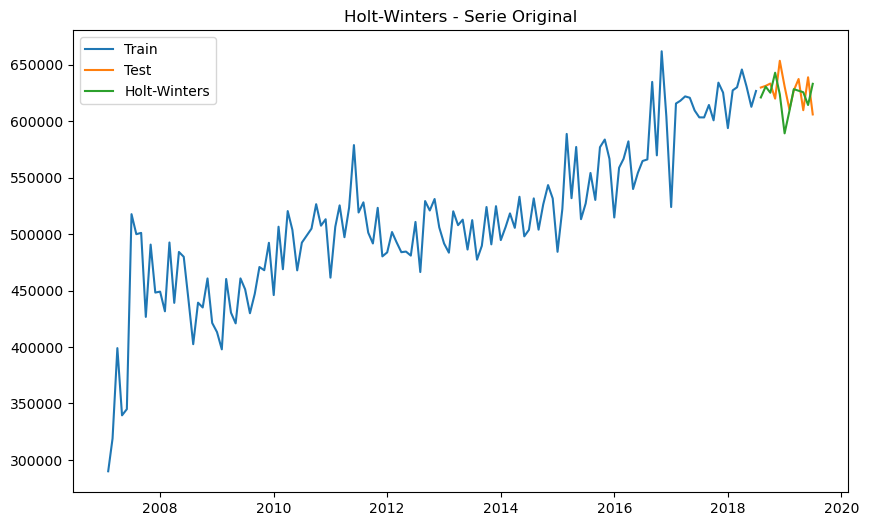

In [52]:
# Gráfico
plt.figure(figsize=(10,6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(pred, label="Holt-Winters")
plt.legend()
plt.title("Holt-Winters - Serie Original")
plt.show()